In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [48]:
fraudTrain = pd.read_csv('fraudTrain.csv')


In [49]:
fraudTrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [50]:
fraudTrain.shape

(19476, 23)

In [51]:
fraudTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19476 entries, 0 to 19475
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19476 non-null  int64  
 1   trans_date_trans_time  19476 non-null  object 
 2   cc_num                 19475 non-null  float64
 3   merchant               19475 non-null  object 
 4   category               19475 non-null  object 
 5   amt                    19475 non-null  float64
 6   first                  19475 non-null  object 
 7   last                   19475 non-null  object 
 8   gender                 19475 non-null  object 
 9   street                 19475 non-null  object 
 10  city                   19475 non-null  object 
 11  state                  19475 non-null  object 
 12  zip                    19475 non-null  float64
 13  lat                    19475 non-null  float64
 14  long                   19475 non-null  float64
 15  ci

In [52]:
fraudTest = pd.read_csv('fraudTest.csv')

In [53]:
fraudTest.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [54]:
fraudTest.shape

(19466, 23)

In [55]:
def cleaning_data(clean):
    clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
    clean.dropna()
    return clean

In [56]:
cleaning_data(fraudTrain)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495.0,"Psychologist, counselling",1.325376e+09,36.011293,-82.048315,0.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149.0,Special educational needs teacher,1.325376e+09,49.159047,-118.186462,0.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154.0,Nature conservation officer,1.325376e+09,43.150704,-112.154481,0.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939.0,Patent attorney,1.325376e+09,47.034331,-112.561071,0.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99.0,Dance movement psychotherapist,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19471,fraud_Altenwerth-Kilback,home,18.44,M,38.0460,-122.1866,198.0,Armed forces training and education officer,1.326401e+09,38.076435,-122.601640,0.0
19472,"fraud_Mosciski, Ziemann and Farrell",shopping_net,9.33,F,46.0062,-86.2555,6469.0,Trade mark attorney,1.326401e+09,46.011639,-85.711983,0.0
19473,fraud_Stark-Koss,home,21.82,F,32.6786,-81.2455,302.0,Magazine features editor,1.326401e+09,33.048939,-80.887348,0.0
19474,fraud_Gerhold LLC,home,4.52,F,36.1486,-105.6648,247.0,Architectural technologist,1.326401e+09,36.567927,-105.635082,0.0


<Axes: >

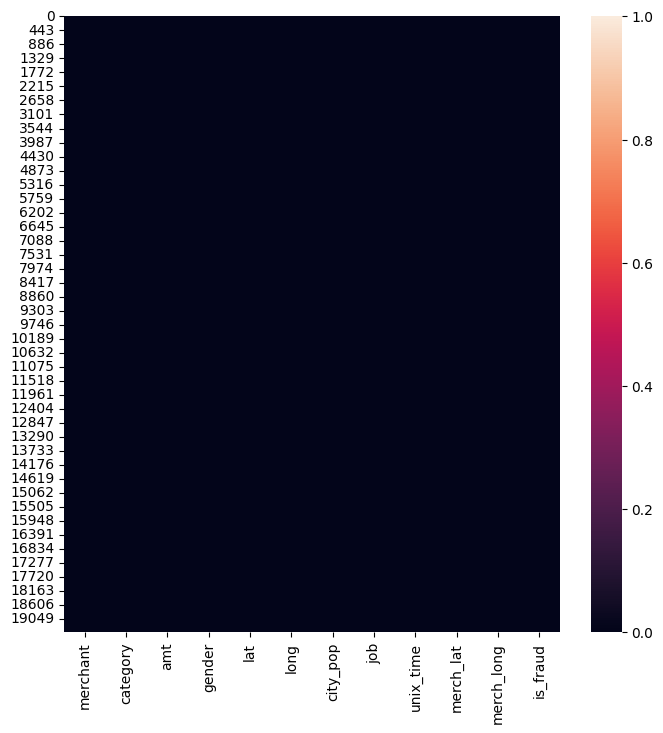

In [59]:
sns.heatmap(fraudTrain.isnull())

In [70]:
from sklearn.preprocessing import OrdinalEncoder

# Select categorical columns
cat_cols = ['merchant', 'category', 'gender', 'job']

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the data
fraudTrain[cat_cols] = encoder.fit_transform(fraudTrain[cat_cols])

# You can also transform the test dataset using the same encoder
fraudTest[cat_cols] = encoder.transform(fraudTest[cat_cols])

# Now, categorical variables are encoded numerically


In [71]:
fraudTrain

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514.0,8.0,4.97,0.0,36.0788,-81.1781,3495.0,356.0,1.325376e+09,36.011293,-82.048315,0.0
1,241.0,4.0,107.23,0.0,48.8878,-118.2105,149.0,411.0,1.325376e+09,49.159047,-118.186462,0.0
2,390.0,0.0,220.11,1.0,42.1808,-112.2620,4154.0,294.0,1.325376e+09,43.150704,-112.154481,0.0
3,360.0,2.0,45.00,1.0,46.2306,-112.1138,1939.0,315.0,1.325376e+09,47.034331,-112.561071,0.0
4,297.0,9.0,41.96,1.0,38.4207,-79.4629,99.0,110.0,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19471,7.0,6.0,18.44,1.0,38.0460,-122.1866,198.0,33.0,1.326401e+09,38.076435,-122.601640,0.0
19472,443.0,11.0,9.33,0.0,46.0062,-86.2555,6469.0,459.0,1.326401e+09,46.011639,-85.711983,0.0
19473,596.0,6.0,21.82,0.0,32.6786,-81.2455,302.0,264.0,1.326401e+09,33.048939,-80.887348,0.0
19474,188.0,6.0,4.52,0.0,36.1486,-105.6648,247.0,30.0,1.326401e+09,36.567927,-105.635082,0.0


In [72]:
fraudTest

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319.0,10.0,2.86,Jeff,Elliott,1.0,351 Darlene Green,...,33.9659,-80.9355,333497.0,274.0,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,591.0,10.0,29.84,Joanne,Williams,0.0,3638 Marsh Union,...,40.3207,-110.4360,302.0,390.0,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,611.0,5.0,41.28,Ashley,Lopez,0.0,9333 Valentine Point,...,40.6729,-73.5365,34496.0,258.0,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,222.0,9.0,60.05,Brian,Williams,1.0,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,405.0,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,292.0,13.0,3.19,Nathan,Massey,1.0,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,195.0,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19461,19461,2020-06-28 07:36:45,3560697798177746,64.0,4.0,78.75,Matthew,Young,1.0,8840 Miller Port Suite 645,...,33.7163,-116.3381,4677.0,252.0,1955-05-06,5b9babebb238635c76ea3a4d159469ef,1.372405e+09,34.640187,-116.625076,0.0
19462,19462,2020-06-28 07:36:58,30153452207526,131.0,12.0,12.09,Robin,Smith,0.0,0537 Margaret Common Suite 526,...,31.8287,-99.4270,5908.0,371.0,1962-04-05,7e9ab5b23935afc5bdd630e41ec8301e,1.372405e+09,31.661750,-98.635733,0.0
19463,19463,2020-06-28 07:37:59,4792627764422477317,522.0,2.0,74.11,Margaret,Mendez,0.0,7952 Karen Pike,...,38.9462,-94.9714,5760.0,69.0,1978-10-01,8d039792a92be0388a223173bde69a8f,1.372405e+09,38.486031,-95.101789,0.0
19464,19464,2020-06-28 07:38:04,3568255211412877,153.0,2.0,75.82,Timothy,Gomez,1.0,707 Anthony Causeway,...,41.2249,-85.0301,5341.0,44.0,1994-11-24,cc5305c9b90e2e8512a98f3ef43a5601,1.372405e+09,42.035201,-85.267221,0.0


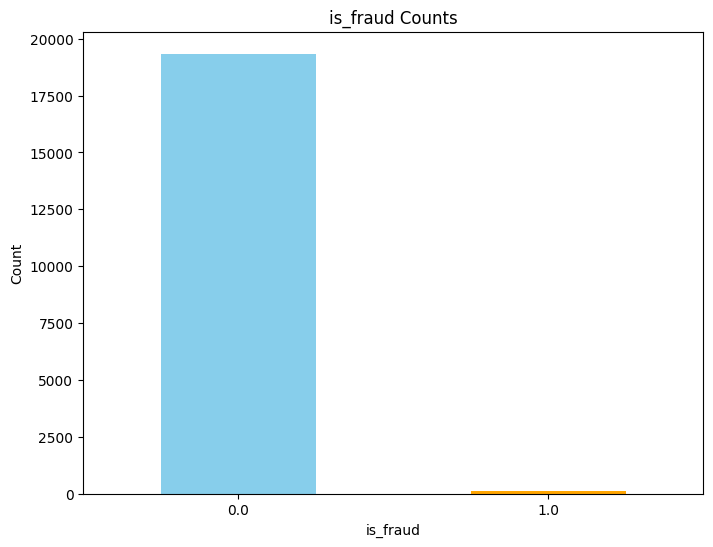

In [73]:
exit_counts = fraudTrain["is_fraud"].value_counts()

plt.figure(figsize=(8, 6))
exit_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("is_fraud Counts")
plt.xlabel("is_fraud")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


In [74]:
fraudTrain.corr()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.022792,-0.003863,0.001032,-0.000436,0.007035,-0.000730,-0.004702,-0.002090,-0.000090,0.007581,-0.006255
category,0.022792,1.000000,0.033814,-0.027087,0.001302,-0.000165,0.016643,-0.005169,0.012097,0.001675,-0.000318,0.015127
amt,-0.003863,0.033814,1.000000,0.000739,0.026323,0.005145,0.006573,-0.001671,0.012655,0.025896,0.005258,0.252913
gender,0.001032,-0.027087,0.000739,1.000000,0.054329,0.049642,-0.026803,-0.074363,0.004689,0.054385,0.049524,0.000232
lat,-0.000436,0.001302,0.026323,0.054329,1.000000,-0.032438,-0.163389,-0.023273,-0.017765,0.993722,-0.032293,0.040202
long,0.007035,-0.000165,0.005145,0.049642,-0.032438,1.000000,-0.043949,0.004755,0.018624,-0.032877,0.999162,-0.009089
city_pop,-0.000730,0.016643,0.006573,-0.026803,-0.163389,-0.043949,1.000000,-0.052024,0.003244,-0.161842,-0.044086,0.005616
job,-0.004702,-0.005169,-0.001671,-0.074363,-0.023273,0.004755,-0.052024,1.000000,0.002685,-0.022054,0.004496,-0.001884
unix_time,-0.002090,0.012097,0.012655,0.004689,-0.017765,0.018624,0.003244,0.002685,1.000000,-0.017479,0.018256,0.027885
merch_lat,-0.000090,0.001675,0.025896,0.054385,0.993722,-0.032877,-0.161842,-0.022054,-0.017479,1.000000,-0.032747,0.040491


<Axes: >

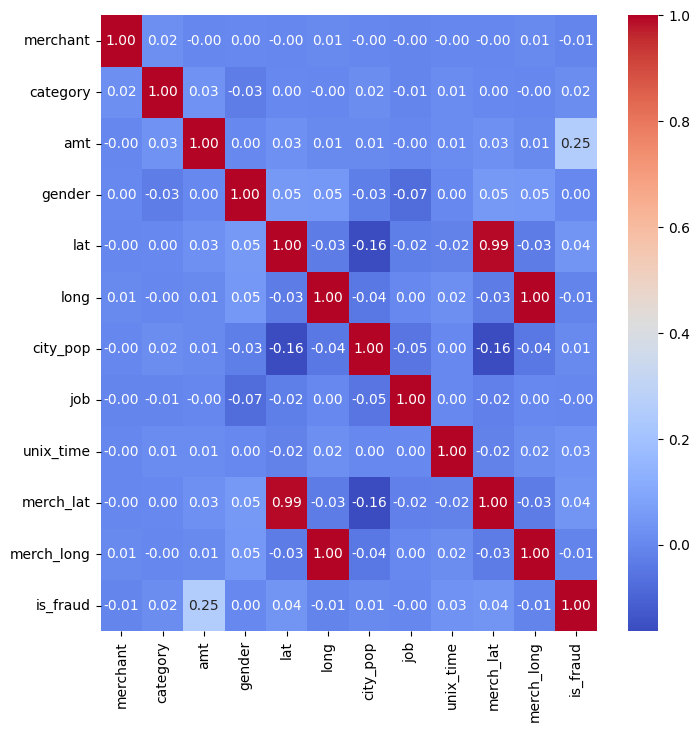

In [75]:
sns.heatmap(fraudTrain.corr(),annot=True,cmap='coolwarm', fmt=".2f")

In [76]:
x = fraudTrain.drop(columns=["is_fraud"], inplace = False)
y = fraudTrain["is_fraud"]

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

In [79]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'DecisionTreeClassifier']
accuracies=[]

In [88]:
from sklearn.impute import SimpleImputer


In [96]:
imputer = SimpleImputer(strategy='mean')
target_imputer = SimpleImputer(strategy='most_frequent')

In [98]:
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)
y_train_imputed = target_imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_imputed = target_imputer.transform(y_test.values.reshape(-1, 1)).ravel()

In [106]:
def cal (model):
    model.fit(x_train_imputed, y_train_imputed)
    predictions = model.predict(x_test_imputed)
    accuracy = accuracy_score(y_test_imputed, predictions)

    accuracies.append(accuracy)


    print(model)

    print("accuracy is:",accuracy)
    print()

In [107]:
# Evaluate the models using the preprocessed data
accuracy_model1 = cal(model1)
accuracy_model1 = cal(model2)
accuracy_model3 = cal(model3)


LogisticRegression()
accuracy is: 0.9948665297741273

RandomForestClassifier()
accuracy is: 0.9987166324435318

DecisionTreeClassifier()
accuracy is: 0.997946611909651

